## K-nearest-neighbour algorithm
### Iris flower classification using ML

In [1]:
import pandas as pd

In [2]:
iris = pd.read_csv('Iris.csv')

In [3]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
iris.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [8]:
y = iris['Species'].map({
    'Iris-setosa':0,
    'Iris-versicolor':1,
    'Iris-virginica':2
})

In [9]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [10]:
x = iris.drop(['Id','Species'],axis=1)

In [11]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.40)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 3)

In [14]:
model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [15]:
SepalLengthCm = float(input("Enter SepalLengthCm: "))
SepalWidthCm = float(input("Enter SepalWidthCm: "))
PetalLengthCm = float(input("Enter PetalLengthCm: "))
PetalWidthCm = float(input("Enter PetalWidthCm: "))
                           
import numpy as np
name = np.array([['Iris-setosa'],['Iris-versicolor'],['Iris-virginica']])
r = name[model.predict([[SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm]])]
print("It is ", r)

Enter SepalLengthCm: 3
Enter SepalWidthCm: 45
Enter PetalLengthCm: 2
Enter PetalWidthCm: 3
It is  [['Iris-setosa']]


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [16]:
ypred = model.predict(xtest)

In [17]:
ypred

array([0, 1, 2, 1, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 2,
       1, 2, 1, 1, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2], dtype=int64)

In [18]:
model.score(xtest,ytest)*100

95.0

In [19]:
x1 = x['SepalLengthCm']
x2 = x['SepalWidthCm']
x3 = x['PetalLengthCm']
x4 = x['PetalWidthCm']

In [20]:
x.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [21]:
import matplotlib.pyplot as plt

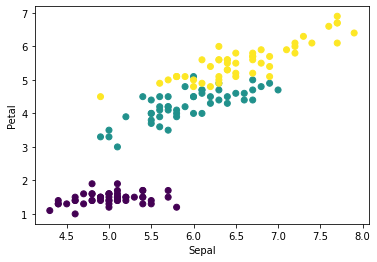

In [22]:
plt.scatter(x1,x3,c=y)
plt.xlabel("Sepal")
plt.ylabel("Petal")
plt.show()

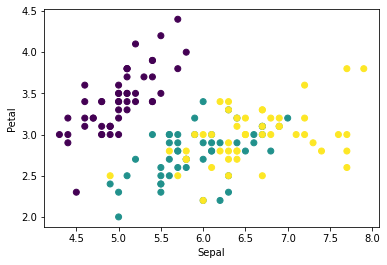

In [23]:
plt.scatter(x1,x2,c=y)
plt.xlabel("Sepal")
plt.ylabel("Petal")
plt.show()

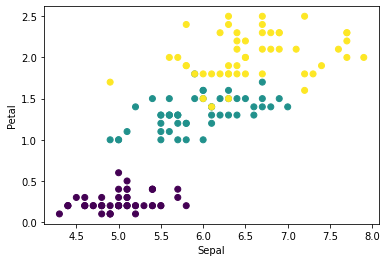

In [24]:
plt.scatter(x1,x4,c=y)
plt.xlabel("Sepal")
plt.ylabel("Petal")
plt.show()

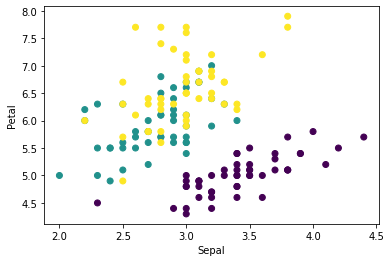

In [25]:
plt.scatter(x2,x1,c=y)
plt.xlabel("Sepal")
plt.ylabel("Petal")
plt.show()

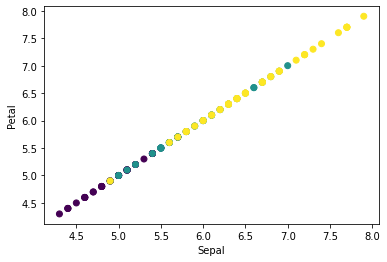

In [26]:
plt.scatter(x1,x1,c=y)
plt.xlabel("Sepal")
plt.ylabel("Petal")
plt.show()

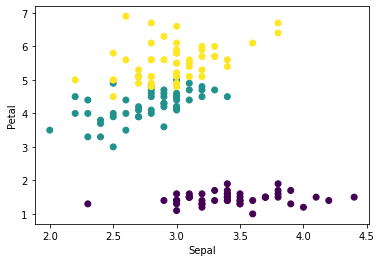

In [27]:
plt.scatter(x2,x3,c=y)
plt.xlabel("Sepal")
plt.ylabel("Petal")
plt.show()

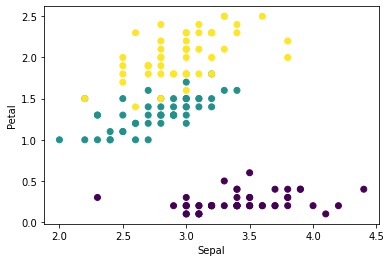

In [28]:
plt.scatter(x2,x4,c=y)
plt.xlabel("Sepal")
plt.ylabel("Petal")
plt.show()